In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import torch

## MIOU decay of all real-time models

In [ ]:
pidnet_l = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/pidnet_l.p", "rb" ))
pidnet_m = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/pidnet_m.p", "rb" ))
pidnet_s = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/pidnet_s.p", "rb" ))
icnet = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/icnet.p", "rb" ))
bisenetv1 = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/bisenet_v1.p", "rb" ))
bisenetv2 = pickle.load(open( "/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/bisenet_v2.p", "rb" ))

# Patches

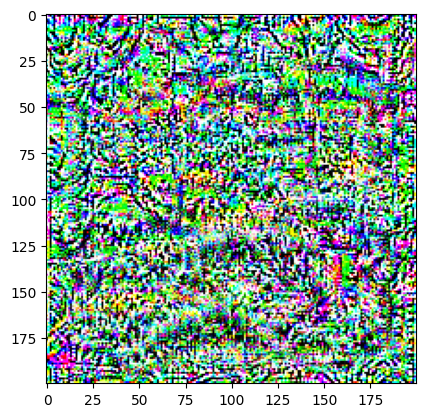

In [ ]:
patch = pidnet_l[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

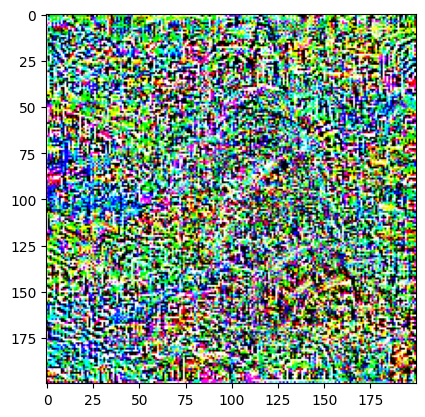

In [ ]:
patch = pidnet_m[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

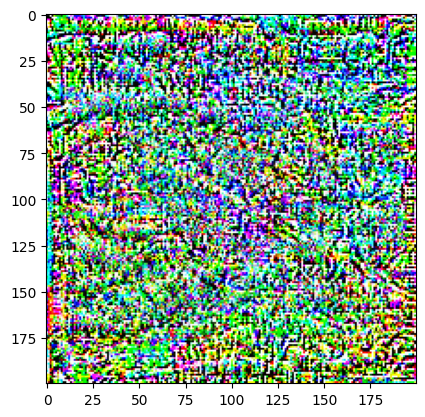

In [ ]:
patch = pidnet_s[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

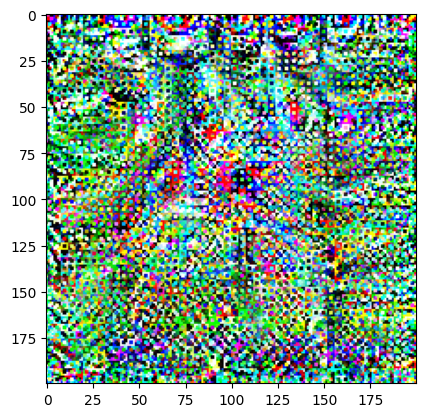

In [ ]:
patch = icnet[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

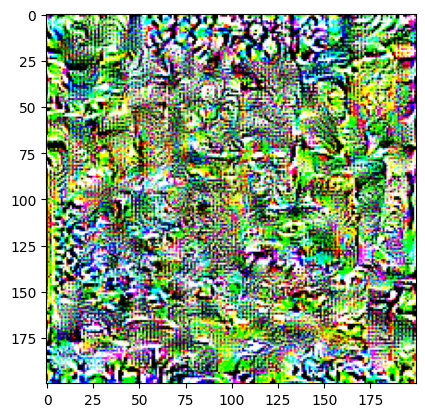

In [ ]:
patch = bisenetv1[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

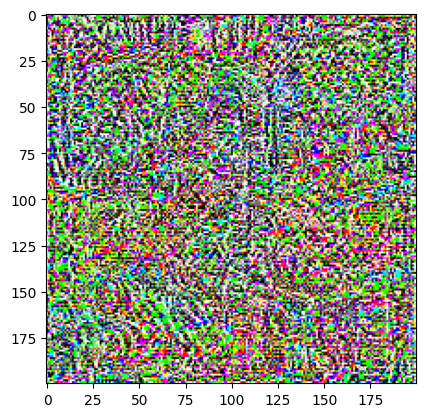

In [ ]:
patch = bisenetv2[0]
plt.imshow(patch.cpu().permute(1,2,0))
plt.show()

# Making miou plots

In [ ]:
pidnet_l_miou = np.array(pidnet_l[1])
pidnet_m_miou = np.array(pidnet_m[1])
pidnet_s_miou = np.array(pidnet_s[1])
icnet_miou =  np.array(icnet[1])
bisenetv1_miou = np.array(bisenetv1[1])
bisenetv2_miou = np.array(bisenetv2[1])

In [ ]:
## Adding the IoUs at the beginning
pidnet_s_0 = np.array([0.9874, 0.9018, 0.9419, 0.8344, 0.8042, 0.6470, 0.7189, 0.7665, 0.9326,
        0.8158, 0.9520, 0.8657, 0.7209, 0.9560, 0.8729, 0.9134, 0.9198, 0.7416,
        0.7847])
pidnet_m_0 = np.array([0.9874, 0.8971, 0.9402, 0.8011, 0.8109, 0.6601, 0.7137, 0.8146, 0.9327,
        0.8319, 0.9540, 0.8652, 0.7267, 0.9568, 0.8738, 0.9247, 0.9271, 0.7646,
        0.7923])

pidnet_l_0 = np.array([0.9911, 0.9277, 0.9540, 0.8912, 0.8827, 0.7297, 0.7662, 0.8549, 0.9468,
        0.8717, 0.9599, 0.8961, 0.8036, 0.9649, 0.9225, 0.9515, 0.9427, 0.8155,
        0.8327])
icnet_0 = np.array([0.9658, 0.7690, 0.8800, 0.6064, 0.5199, 0.4260, 0.3857, 0.5880, 0.8953,
        0.6902, 0.9317, 0.7407, 0.5015, 0.9111, 0.7391, 0.8071, 0.8313, 0.6138,
        0.6104])
bisenetv1_0 = np.array([0.9817, 0.8725, 0.9207, 0.7464, 0.7725, 0.5931, 0.6681, 0.7772, 0.9166,
        0.7969, 0.9486, 0.8300, 0.6954, 0.9471, 0.8209, 0.8901, 0.8930, 0.7284,
        0.7480])
bisenetv2_0 = np.array([0.9722, 0.7979, 0.8842, 0.5069, 0.6038, 0.5210, 0.6010, 0.7062, 0.8964,
        0.6695, 0.9241, 0.7958, 0.5530, 0.9293, 0.6801, 0.7142, 0.7282, 0.5724,
        0.6963])

In [ ]:
# prompt: In pidnet_l_miou insert pidnet_l_0 as the 0th row. In pidnet_m_miou insert pidnet_m_0 as the 0th row and like that do for all 6 arrays

pidnet_l_miou = np.insert(pidnet_l_miou, 0, pidnet_l_0, axis=0)
pidnet_m_miou = np.insert(pidnet_m_miou, 0, pidnet_m_0, axis=0)
pidnet_s_miou = np.insert(pidnet_s_miou, 0, pidnet_s_0, axis=0)
icnet_miou = np.insert(icnet_miou, 0, icnet_0, axis=0)
bisenetv1_miou = np.insert(bisenetv1_miou, 0, bisenetv1_0, axis=0)
bisenetv2_miou = np.insert(bisenetv2_miou, 0, bisenetv2_0, axis=0)


In [ ]:
color_list = [
    'blue',
    'orange',
    'green',
    'red',
    'purple',
    'brown',
    'pink',
    'gray',
    'olive',
    'cyan',
    'lightblue',
    'lightgreen',
    'lightpink',
    'lightgray',
    'lightcyan',
    'magenta',
    'yellow',
    'black',
    'deeppink'

]
print(len(color_list))

19


In [ ]:
cityscapes_classes = {
    1: "Road",
    2: "Sidewalk",
    3: "Building",
    4: "Wall",
    5: "Fence",
    6: "Pole",
    7: "Traffic Light",
    8: "Traffic Sign",
    9: "Vegetation",
    10: "Terrain",
    11: "Sky",
    12: "Person",
    13: "Rider",
    14: "Car",
    15: "Truck",
    16: "Bus",
    17: "Train",
    18: "Motorcycle",
    19: "Bicycle"
}


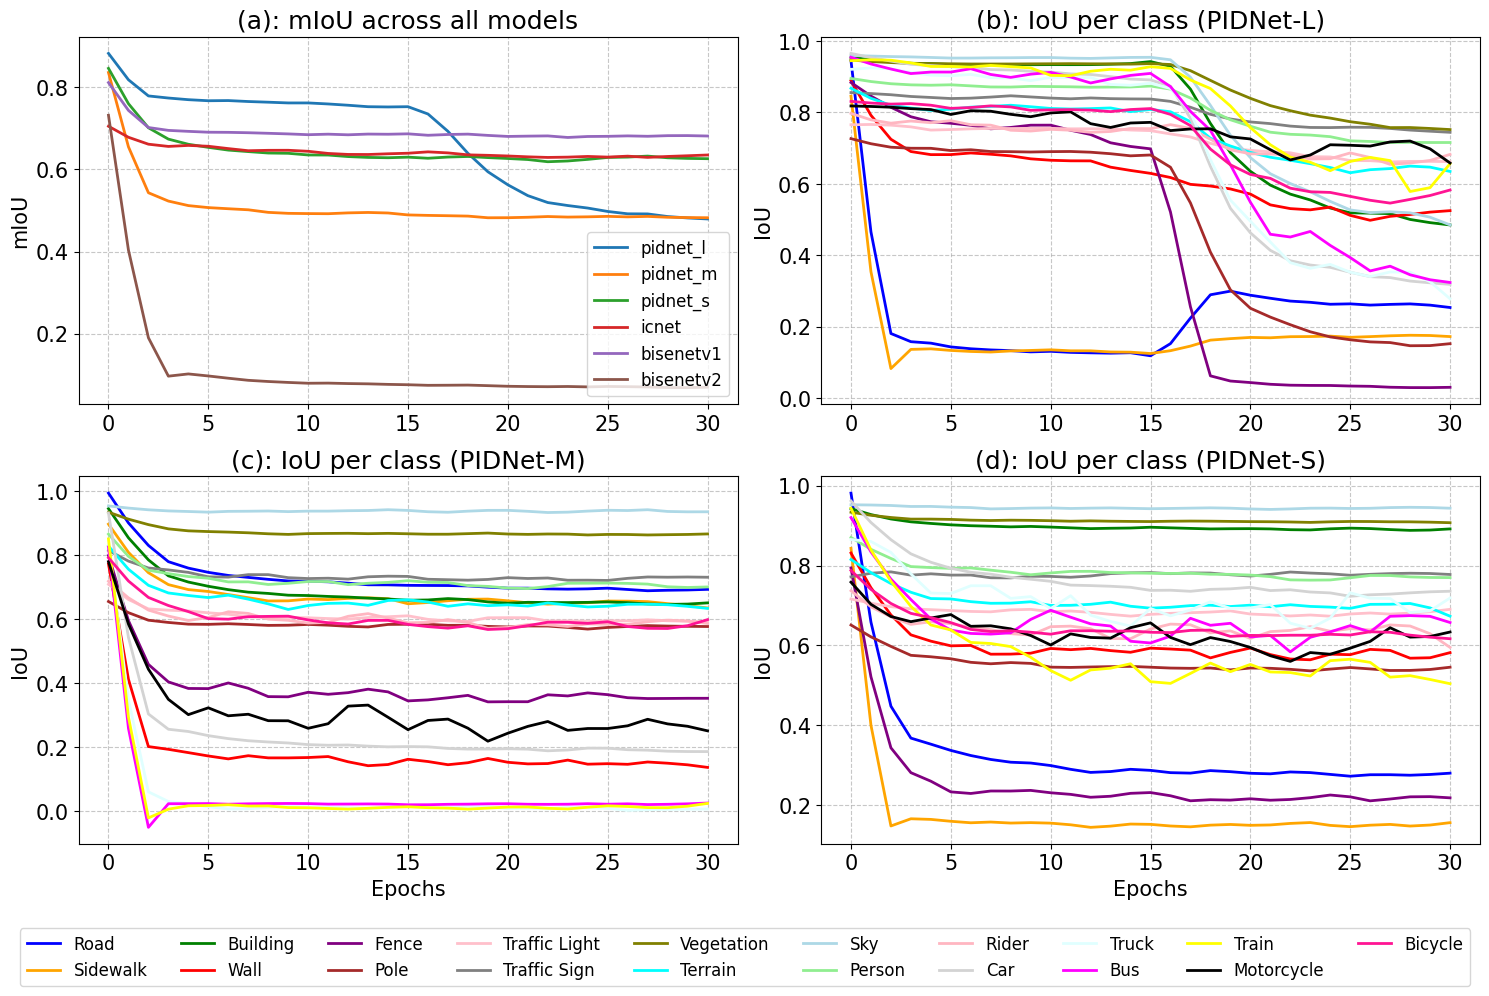

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average mIoU across all models
models = {
    'pidnet_l': pidnet_l_miou,
    'pidnet_m': pidnet_m_miou,
    'pidnet_s': pidnet_s_miou,
    'icnet': icnet_miou,
    'bisenetv1': bisenetv1_miou,
    'bisenetv2': bisenetv2_miou
}
for model_name, miou in models.items():
  average_miou = np.mean(miou, axis=1)
  # Apply Savitzky-Golay filter for smoothing
  smoothed_miou = savgol_filter(average_miou, window_length=5, polyorder=2) # Adjust window_length as needed
  axes[0, 0].plot(smoothed_miou, lw = 2,label=model_name)

axes[0, 0].set_title('(a): mIoU across all models',size = 18)
#axes[0, 0].set_xlabel('Epochs',size = 15)
axes[0, 0].set_ylabel('mIoU',size = 15)
axes[0, 0].legend(prop = {'size': 12},loc = 4)
axes[0,0].grid(True, linestyle='--', alpha=0.7) # Add a grid



# Plot 2: mIoU for pidnet_l across all classes
for i in range(pidnet_l_miou.shape[1]):
    #axes[0, 1].plot(pidnet_l_miou[:, i], label=f'Class {i}')
    axes[0, 1].plot(savgol_filter(pidnet_l_miou[:, i], window_length=5, polyorder=2), lw = 2, color = color_list[i], label=f'Class {i}')

axes[0,1].set_title('(b): IoU per class (PIDNet-L)',size = 18)
#axes[0,1].set_xlabel('Epochs',size = 15)
axes[0,1].set_ylabel('IoU',size = 15)
#axes[0, 1].legend() # Commenting out legend due to potential overcrowding
axes[0,1].grid(True, linestyle='--', alpha=0.7) # Add a grid


# Plot 3: mIoU for pidnet-m across all classes
for i in range(pidnet_m_miou.shape[1]):
    #axes[1, 0].plot(pidnet_m_miou[:, i], label=f'Class {i}')
    axes[1, 0].plot(savgol_filter(pidnet_m_miou[:, i], window_length=5, polyorder=2), lw = 2, color = color_list[i],label=f'Class {i}')
axes[1, 0].set_title('(c): IoU per class (PIDNet-M)',size = 18)
axes[1, 0].set_xlabel('Epochs' ,size = 15)
axes[1, 0].set_ylabel('IoU',size = 15)
#axes[1, 0].legend()
axes[1,0].grid(True, linestyle='--', alpha=0.7) # Add a grid


# Plot 4: mIoU for pidnet-s across all classes
for i in range(pidnet_s_miou.shape[1]):
    #axes[1, 1].plot(pidnet_s_miou[:, i], label=f'Class {i}')
    axes[1, 1].plot(savgol_filter(pidnet_s_miou[:, i], window_length=5, polyorder=2), lw = 2,color = color_list[i],label=f'Class {i}')
axes[1, 1].set_title('(d): IoU per class (PIDNet-S)',size = 18)
axes[1, 1].set_xlabel('Epochs',size = 15)
axes[1, 1].set_ylabel('IoU',size = 15)
#axes[1, 1].legend()
axes[1,1].grid(True, linestyle='--', alpha=0.7) # Add a grid
plt.tight_layout()

# Improve overall plot aesthetics
#plt.style.use('whitegrid') # Use a visually appealing style
#plt.suptitle('mIoU Performance of Different Segmentation Models', fontsize=16) # Add a main title

for ax in axes.flat:
    # ax.set_xlabel('Epochs', fontsize=12)
    # ax.set_ylabel('IoU', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=15) # Adjust tick label size



# Add legend outside the plots for subplots 2, 3, and 4
handles, labels = axes[0,1].get_legend_handles_labels()
fig.legend(handles, [cityscapes_classes[int(label.split()[1])+1] for label in labels],
           prop = {'size': 12},loc='lower center', ncol=10, bbox_to_anchor=(0.5, -0.05)) # Adjust ncol for better spacing

# handles, labels = axes[1,0].get_legend_handles_labels()
# fig.legend(handles, [cityscapes_classes[int(label.split()[1])+1] for label in labels],
#            loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.1)) # Adjust ncol and bbox_to_anchor

# handles, labels = axes[1,1].get_legend_handles_labels()
# fig.legend(handles, [cityscapes_classes[int(label.split()[1])+1] for label in labels],
#            loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.15)) # Adjust ncol and bbox_to_anchor

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to accommodate suptitle
plt.savefig("/content/drive/MyDrive/Colab Notebooks/1_Papers/3_Attack_generation/Experiments/figure2.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()


In [97]:
from scipy.signal import savgol_filter